In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, ttest_ind
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [5]:
df = pd.read_csv("E-commerce Customer Behavior - Sheet1.csv")

In [6]:
df.head()

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied


In [7]:
print(df.isnull().sum())

Customer ID                 0
Gender                      0
Age                         0
City                        0
Membership Type             0
Total Spend                 0
Items Purchased             0
Average Rating              0
Discount Applied            0
Days Since Last Purchase    0
Satisfaction Level          2
dtype: int64


In [8]:
df = df.dropna(subset=["Satisfaction Level"])
df = df.drop_duplicates()
print(df.isnull().sum())

Customer ID                 0
Gender                      0
Age                         0
City                        0
Membership Type             0
Total Spend                 0
Items Purchased             0
Average Rating              0
Discount Applied            0
Days Since Last Purchase    0
Satisfaction Level          0
dtype: int64


In [9]:
satisfaction_mapping = {"Unsatisfied": 0, "Neutral": 1, "Satisfied": 2}
df["Satisfaction Level"] = df["Satisfaction Level"].map(satisfaction_mapping)

In [10]:
membership_mapping = {"Bronze": 1, "Silver": 2, "Gold": 3}
df["Membership Type"] = df["Membership Type"].map(membership_mapping)

In [13]:
df["Discount Applied"] = df["Discount Applied"].astype(int)

C:\Users\ToryLinux\AppData\Local\Temp\ipykernel_9736\2415191327.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Satisfaction Level", data=df, palette="coolwarm")


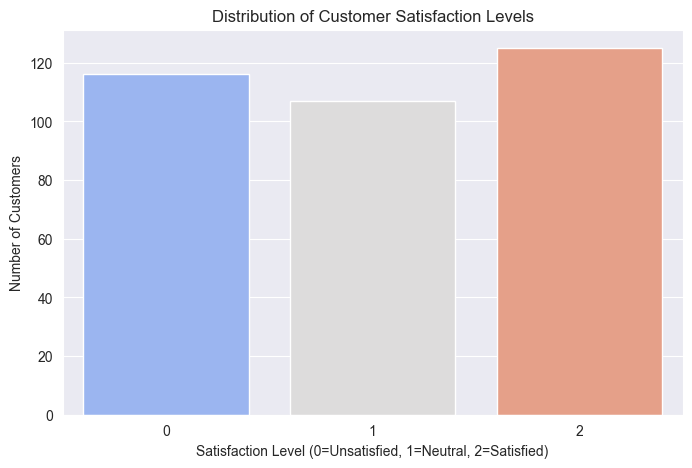

In [11]:
plt.figure(figsize=(8, 5))
sns.countplot(x="Satisfaction Level", data=df, palette="coolwarm")
plt.title("Distribution of Customer Satisfaction Levels")
plt.xlabel("Satisfaction Level (0=Unsatisfied, 1=Neutral, 2=Satisfied)")
plt.ylabel("Number of Customers")
plt.show()

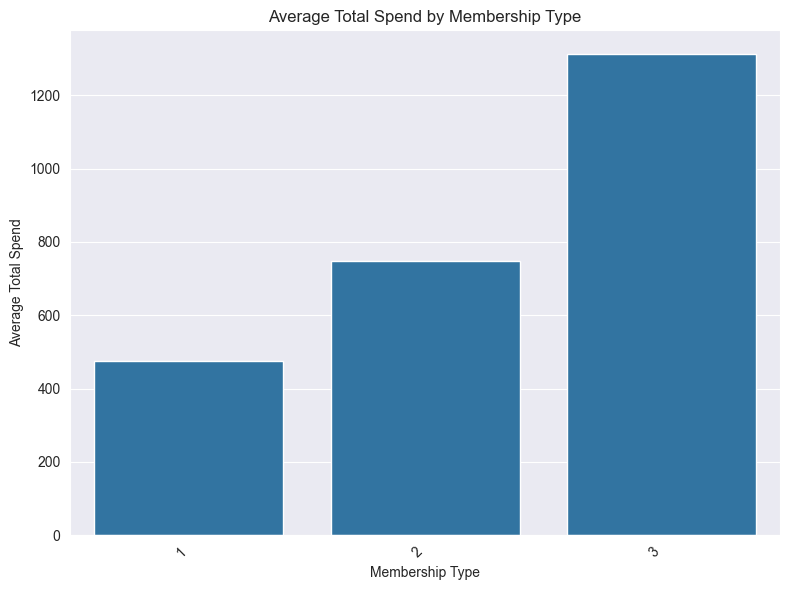

In [12]:
average_spend_by_membership = df.groupby('Membership Type')['Total Spend'].mean()
plt.figure(figsize=(8, 6))
sns.barplot(x=average_spend_by_membership.index, y=average_spend_by_membership.values)
plt.title('Average Total Spend by Membership Type')
plt.xlabel('Membership Type')
plt.ylabel('Average Total Spend')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

C:\Users\ToryLinux\AppData\Local\Temp\ipykernel_9736\1207267528.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Satisfaction Level", y="Total Spend", data=df, palette="coolwarm")


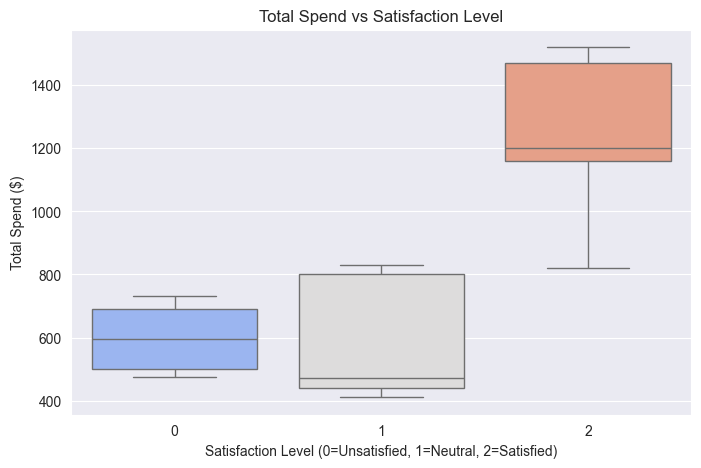

In [13]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="Satisfaction Level", y="Total Spend", data=df, palette="coolwarm")
plt.title("Total Spend vs Satisfaction Level")
plt.xlabel("Satisfaction Level (0=Unsatisfied, 1=Neutral, 2=Satisfied)")
plt.ylabel("Total Spend ($)")
plt.show()

In [14]:
contingency_table = pd.crosstab(df["Discount Applied"], df["Satisfaction Level"])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Corrected Chi-Square p-value: {p:.50f}")

Corrected Chi-Square p-value: 0.00000000000000000000000000000000000000000000000031


**************** EXTREMELY HIGH SIGNIFICANCE ****************

C:\Users\ToryLinux\AppData\Local\Temp\ipykernel_9736\3199804731.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Membership Type", y="Total Spend", data=df, palette="viridis")


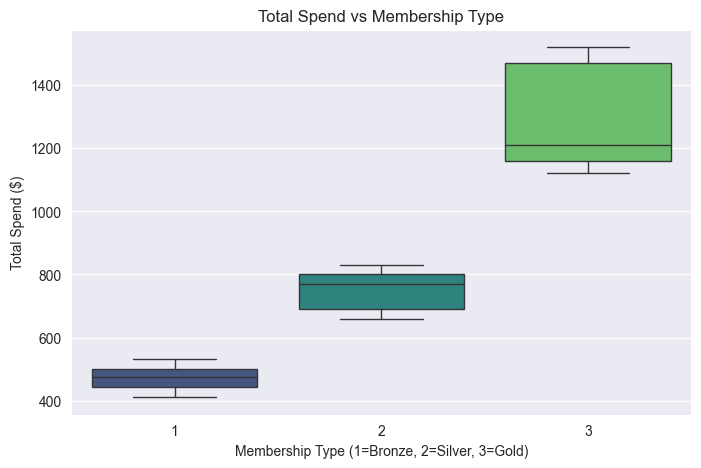

In [15]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="Membership Type", y="Total Spend", data=df, palette="viridis")
plt.title("Total Spend vs Membership Type")
plt.xlabel("Membership Type (1=Bronze, 2=Silver, 3=Gold)")
plt.ylabel("Total Spend ($)")
plt.show()

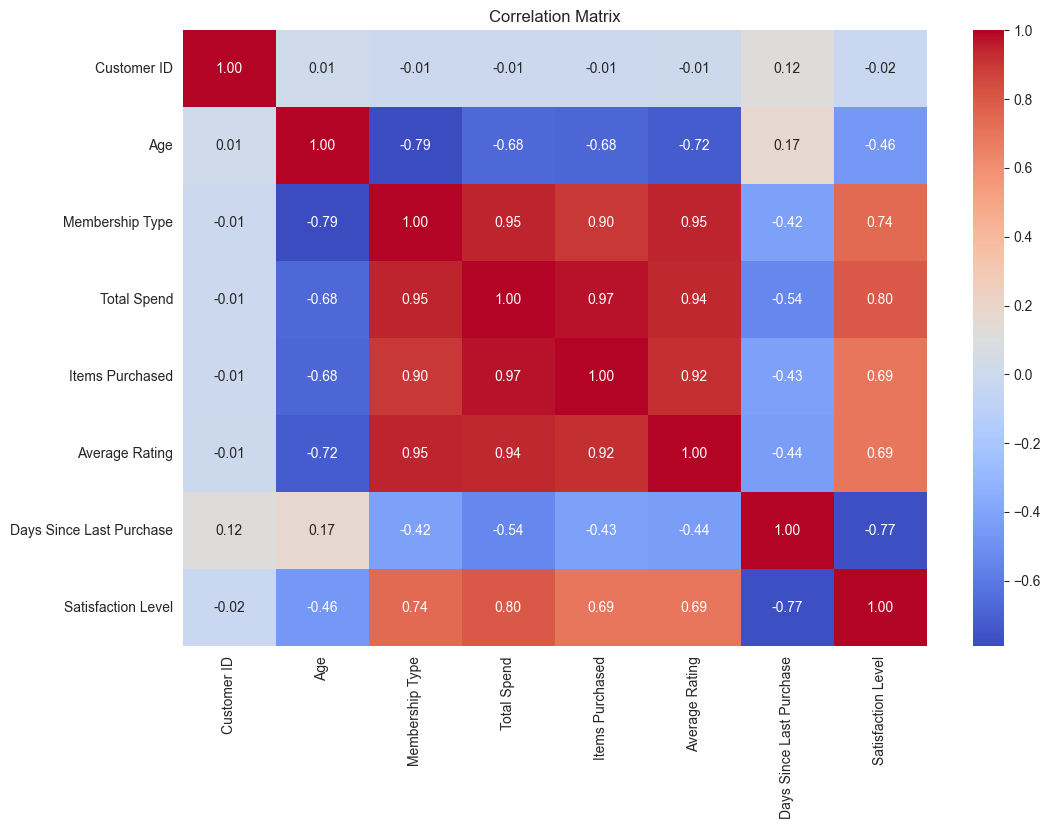

In [16]:
numeric_columns = df.select_dtypes(include='number')
correlation_matrix = numeric_columns.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [22]:
repeat_customers = df[df["Days Since Last Purchase"] < 30]
non_repeat_customers = df[df["Days Since Last Purchase"] >= 30]

t_stat, p_value = ttest_ind(repeat_customers["Total Spend"], non_repeat_customers["Total Spend"], equal_var=False)
print(f"T-Test p-value: {p_value:.50f}")

T-Test p-value: 0.00000000000000000000000000064269605733374500479349


***************** VERY HIGH SIGNIFICANCE *****************

In [18]:
df["Is Loyal"] = (df["Days Since Last Purchase"] < 30).astype(int)

features = df[["Age", "Total Spend", "Items Purchased", "Average Rating", "Discount Applied", "Membership Type"]]
labels = df["Is Loyal"]

In [19]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.5%}")
print(classification_report(y_test, y_pred))

Accuracy: 92.85714%
              precision    recall  f1-score   support

           0       0.86      0.90      0.88        21
           1       0.96      0.94      0.95        49

    accuracy                           0.93        70
   macro avg       0.91      0.92      0.92        70
weighted avg       0.93      0.93      0.93        70

